In [1]:
# function that takes the top ten percent CO from a file. Takes in all files and makes one file. 

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt
import datetime
import csv
import math
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from coordinateSystems import GeographicSystem
from coordinateSystems import TangentPlaneCartesianSystem

In [57]:
def bot_ten_SCK3(filelist,var,output_file):
    '''
    Generates a new file of only the top 10% CO levels for a list of files. Only for SCK3.
    Input the list of files.
    Output an output file of all days combined
    '''
    
    with open(output_file, 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(['GPStime','SCK3time','FStime',
                         'X(m)','Y(m)',
                         'lat(DD)','lon(DD)','bearing(deg)','speed(m/s)','distance(m)',
                         'SCK3_CO','SCK3_NO2','SCK3_TC','SCK3_RH','SCK3_LX','SCK3_DB',
                         'FS_TF','FS_RH','FS_WS','FS_WD','FS_UP','FS_DN',
                         'V_r','uwind','vwind','uact','vact'])
    
    for i,item in enumerate(filelist):
        # reading in data
        data = pd.read_csv(item)
        field = data[var]
        
        #calculating percentiles
        stat = field.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
        
        # getting gps corrdinates on local plane
        lat_deg = data['lat(DD)']
        lon_deg = data['lon(DD)']
        alt = np.zeros_like(np.array(lat_deg))
        geo = GeographicSystem() 
        X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Using degrees
        stack = np.vstack((X,Y,Z))
        lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
        tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
        local = (tangent.toLocal(stack))
        local2 = local[:,:].T
        
        #Separating the top ten percent of CO values and indexing 
        X = []
        Y = []
        ind = []
        for i in range(0,len(field)):
                if (field[i] < stat[4]):
                    X = np.append(local2[i,:2][0],X)
                    Y = np.append(local2[i,:2][1],Y)
                    ind = np.append(i,ind)
                else:
                    pass
        X = X[::-1]
        Y = Y[::-1]
        ind = ind[::-1]
        
            # write to columns in .csv
        rows = zip(data['GPStime'][ind],data['SCK3time'][ind],data['FStime'][ind], # time columns
                   
                   X,Y, # distances for plotting

                   data['lat(DD)'][ind],data['lon(DD)'][ind],data['bearing(deg)'][ind],
                   data['speed(m/s)'][ind],data['distance(m)'][ind], #gps columns

                   data['SCK3_CO'][ind],data['SCK3_NO2'][ind],data['SCK3_TC'][ind], # sck1 columns
                   data['SCK3_RH'][ind],data['SCK3_LX'][ind],data['SCK3_DB'][ind],

                   data['FS_TF'][ind],data['FS_RH'][ind],data['FS_WS'][ind], # fs columns
                   data['FS_WD'][ind],data['FS_UP'][ind],data['FS_DN'][ind],

                   data['V_r'][ind], data['uwind'][ind], data['vwind'][ind],
                   data['uact'][ind], data['vact'][ind]) # calculated columns

        with open(output_file, 'a') as fa:
            writer = csv.writer(fa)
            for i in rows:
                writer.writerow(i) 
        print 'Done writing file for',item

In [58]:
def top_ten_SCK3(filelist,var,output_file):
    '''
    Generates a new file of only the top 10% CO levels for a list of files. Only for SCK2.
    Input the list of files.
    Output an output file of all days combined
    '''
    
    with open(output_file, 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(['GPStime','SCK3time','FStime',
                         'X(m)','Y(m)',
                         'lat(DD)','lon(DD)','bearing(deg)','speed(m/s)','distance(m)',
                         'SCK3_CO','SCK3_NO2','SCK3_TC','SCK3_RH','SCK3_LX','SCK3_DB',
                         'FS_TF','FS_RH','FS_WS','FS_WD','FS_UP','FS_DN',
                         'V_r','uwind','vwind','uact','vact'])
    
    for i,item in enumerate(filelist):
        # reading in data
        data = pd.read_csv(item)
        field = data[var]
        
        #calculating percentiles
        stat = field.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
        
        # getting gps corrdinates on local plane
        lat_deg = data['lat(DD)']
        lon_deg = data['lon(DD)']
        alt = np.zeros_like(np.array(lat_deg))
        geo = GeographicSystem() 
        X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Using degrees
        stack = np.vstack((X,Y,Z))
        lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
        tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
        local = (tangent.toLocal(stack))
        local2 = local[:,:].T
        
        #Separating the top ten percent of CO values and indexing 
        X = []
        Y = []
        ind = []
        for i in range(0,len(field)):
                if (field[i] > stat[12]):
                    X = np.append(local2[i,:2][0],X)
                    Y = np.append(local2[i,:2][1],Y)
                    ind = np.append(i,ind)
                else:
                    pass
        X = X[::-1]
        Y = Y[::-1]
        ind = ind[::-1]
        
            # write to columns in .csv
        rows = zip(data['GPStime'][ind],data['SCK3time'][ind],data['FStime'][ind], # time columns
                   
                   X,Y, # distances for plotting

                   data['lat(DD)'][ind],data['lon(DD)'][ind],data['bearing(deg)'][ind],
                   data['speed(m/s)'][ind],data['distance(m)'][ind], #gps columns

                   data['SCK3_CO'][ind],data['SCK3_NO2'][ind],data['SCK3_TC'][ind], # sck1 columns
                   data['SCK3_RH'][ind],data['SCK3_LX'][ind],data['SCK3_DB'][ind],

                   data['FS_TF'][ind],data['FS_RH'][ind],data['FS_WS'][ind], # fs columns
                   data['FS_WD'][ind],data['FS_UP'][ind],data['FS_DN'][ind],

                   data['V_r'][ind], data['uwind'][ind], data['vwind'][ind],
                   data['uact'][ind], data['vact'][ind]) # calculated columns

        with open(output_file, 'a') as fa:
            writer = csv.writer(fa)
            for i in rows:
                writer.writerow(i) 
        print 'Done writing file for',item

In [59]:
def all_days_SCK3(filelist,var,output_file):
    '''
    Generates a new file of files combined. Only for SCK3.
    Inputs the list of files.
    Output an output file of all days combined
    '''
    
    with open(output_file, 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(['GPStime','SCK3time','FStime',
                         'X(m)','Y(m)',
                         'lat(DD)','lon(DD)','bearing(deg)','speed(m/s)','distance(m)',
                         'SCK3_CO','SCK3_NO2','SCK3_TC','SCK3_RH','SCK3_LX','SCK3_DB',
                         'FS_TF','FS_RH','FS_WS','FS_WD','FS_UP','FS_DN',
                         'V_r','uwind','vwind','uact','vact'])
    
    for i,item in enumerate(filelist):
        # reading in data
        data = pd.read_csv(item)
        field = data[var]
        
        #calculating percentiles
        #stat = field.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
        
        # getting gps corrdinates on local plane
        lat_deg = data['lat(DD)']
        lon_deg = data['lon(DD)']
        alt = np.zeros_like(np.array(lat_deg))
        geo = GeographicSystem() 
        X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Using degrees
        stack = np.vstack((X,Y,Z))
        lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
        tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
        local = (tangent.toLocal(stack))
        local2 = local[:,:].T
        
        #Separating the top ten percent of CO values and indexing 
        X = []
        Y = []
        ind = []
        for i in range(0,len(field)):
                if (field[i] < 10000000.):
                    X = np.append(local2[i,:2][0],X)
                    Y = np.append(local2[i,:2][1],Y)
                    ind = np.append(i,ind)
                else:
                    pass
        X = X[::-1]
        Y = Y[::-1]
        ind = ind[::-1]
        
            # write to columns in .csv
        rows = zip(data['GPStime'][ind],data['SCK3time'][ind],data['FStime'][ind], # time columns
                   
                   X,Y, # distances for plotting

                   data['lat(DD)'][ind],data['lon(DD)'][ind],data['bearing(deg)'][ind],
                   data['speed(m/s)'][ind],data['distance(m)'][ind], #gps columns

                   data['SCK3_CO'][ind],data['SCK3_NO2'][ind],data['SCK3_TC'][ind], # sck1 columns
                   data['SCK3_RH'][ind],data['SCK3_LX'][ind],data['SCK3_DB'][ind],

                   data['FS_TF'][ind],data['FS_RH'][ind],data['FS_WS'][ind], # fs columns
                   data['FS_WD'][ind],data['FS_UP'][ind],data['FS_DN'][ind],

                   data['V_r'][ind], data['uwind'][ind], data['vwind'][ind],
                   data['uact'][ind], data['vact'][ind]) # calculated columns

        with open(output_file, 'a') as fa:
            writer = csv.writer(fa)
            for i in rows:
                writer.writerow(i) 
        print 'Done writing file for',item

In [60]:
datalist_cases = list([             # ommitted Oct2 because diff route
                 
                 #'Mar2.csv',#1
                 #'Mar4.csv',
                 #'Mar7.csv',
                 #'Mar14.csv', 
                 #'Mar21.csv',#5  
                 #'Mar22.csv', 
                 #'Mar25.csv', 
                 #'Mar28.csv',
                 #'Mar29.csv',
                 #'Mar30.csv',#10
                 #'Apr4.csv',
                 #'Apr5.csv',#12
                 #'Apr7.csv',#13
                 #'Apr13.csv',
                 #'Apr14.csv',#15
                 #'Apr15.csv',
                 'Apr27.csv',
                 'Apr28.csv',
                 'Apr29.csv',
                 'May5.csv',#20
                 'May6.csv'#21
                              ])
                 
print datalist_cases

['Apr27.csv', 'Apr28.csv', 'Apr29.csv', 'May5.csv', 'May6.csv']


In [70]:
top_ten_SCK3(datalist_cases,'SCK3_NO2','ten_NO2_SCK3_cases.csv')

Done writing file for Apr27.csv
Done writing file for Apr28.csv
Done writing file for Apr29.csv
Done writing file for May5.csv
Done writing file for May6.csv


In [68]:
datalist_nocases = list([             # ommitted Oct2 because diff route
                 
                 'Mar2.csv',#1
                 'Mar4.csv',
                 'Mar7.csv',
                 'Mar14.csv', 
                 'Mar21.csv',#5  
                 'Mar22.csv', 
                 'Mar25.csv', 
                 'Mar28.csv',
                 'Mar29.csv',
                 'Mar30.csv',#10
                 'Apr4.csv',
                 'Apr5.csv',#12
                 'Apr7.csv',#13
                 'Apr13.csv',
                 'Apr14.csv',#15
                 'Apr15.csv',
                 #'Apr27.csv',
                 #'Apr28.csv',
                 #'Apr29.csv',
                 #'May5.csv',#20
                 #'May6.csv'#21
                              ])
                 
print datalist_nocases

['Mar2.csv', 'Mar4.csv', 'Mar7.csv', 'Mar14.csv', 'Mar21.csv', 'Mar22.csv', 'Mar25.csv', 'Mar28.csv', 'Mar29.csv', 'Mar30.csv', 'Apr4.csv', 'Apr5.csv', 'Apr7.csv', 'Apr13.csv', 'Apr14.csv', 'Apr15.csv']


In [71]:
top_ten_SCK3(datalist_nocases,'SCK3_NO2','ten_NO2_SCK3_nocases.csv')

Done writing file for Mar2.csv
Done writing file for Mar4.csv
Done writing file for Mar7.csv
Done writing file for Mar14.csv
Done writing file for Mar21.csv
Done writing file for Mar22.csv
Done writing file for Mar25.csv
Done writing file for Mar28.csv
Done writing file for Mar29.csv
Done writing file for Mar30.csv
Done writing file for Apr4.csv
Done writing file for Apr5.csv
Done writing file for Apr7.csv
Done writing file for Apr13.csv
Done writing file for Apr14.csv
Done writing file for Apr15.csv


In [43]:
cases = pd.read_csv('CO_ten_SCK3_cases.csv')
nocases = pd.read_csv('CO_ten_SCK3_nocases.csv')

In [44]:
np.mean(cases['SCK3_CO'])

254.57586372208439

In [45]:
np.mean(nocases['SCK3_CO'])

422.88323834287382

In [46]:
cases[cases.columns[7:-4]].apply(lambda x: x.corr(cases['SCK3_CO']))

bearing(deg)    0.043190
speed(m/s)      0.012979
distance(m)     0.283384
SCK3_CO         1.000000
SCK3_NO2        0.498670
SCK3_TC        -0.862008
SCK3_RH         0.229342
SCK3_LX         0.187295
SCK3_DB         0.271174
FS_TF          -0.470763
FS_RH           0.234300
FS_WS           0.731631
FS_WD          -0.029865
FS_UP          -0.097887
FS_DN          -0.132991
V_r             0.265649
dtype: float64

In [47]:
nocases[nocases.columns[7:-4]].apply(lambda x: x.corr(nocases['SCK3_CO']))

bearing(deg)   -0.013931
speed(m/s)     -0.017314
distance(m)    -0.121037
SCK3_CO         1.000000
SCK3_NO2        0.416071
SCK3_TC        -0.401243
SCK3_RH        -0.199640
SCK3_LX         0.033748
SCK3_DB         0.524328
FS_TF          -0.051571
FS_RH          -0.177298
FS_WS           0.514319
FS_WD           0.115392
FS_UP          -0.247897
FS_DN          -0.276103
V_r             0.311829
dtype: float64

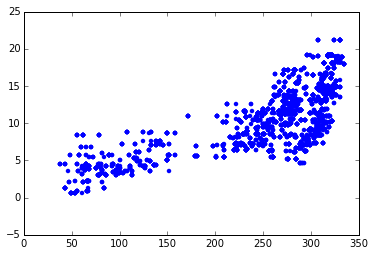

In [48]:
plt.scatter(cases['SCK3_CO'],cases['FS_WS'],linewidths=0)

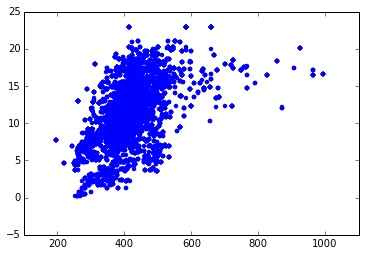

In [49]:
plt.scatter(nocases['SCK3_CO'],nocases['FS_WS'],linewidths=0)

In [50]:
np.mean(cases['SCK3_NO2'])

25.104877239439492

In [51]:
np.mean(nocases['SCK3_NO2'])

45.131661394496057

In [52]:
cases[cases.columns[7:-4]].apply(lambda x: x.corr(cases['SCK3_NO2']))

bearing(deg)    0.093903
speed(m/s)     -0.001321
distance(m)    -0.338742
SCK3_CO         0.498670
SCK3_NO2        1.000000
SCK3_TC        -0.560230
SCK3_RH        -0.498767
SCK3_LX        -0.164790
SCK3_DB         0.393970
FS_TF          -0.362004
FS_RH          -0.609232
FS_WS           0.762760
FS_WD           0.408207
FS_UP           0.283052
FS_DN           0.332797
V_r             0.594671
dtype: float64

In [53]:
nocases[nocases.columns[7:-4]].apply(lambda x: x.corr(nocases['SCK3_NO2']))

bearing(deg)    0.050626
speed(m/s)     -0.029894
distance(m)     0.005341
SCK3_CO         0.416071
SCK3_NO2        1.000000
SCK3_TC         0.018158
SCK3_RH        -0.414406
SCK3_LX        -0.059751
SCK3_DB         0.509826
FS_TF           0.344465
FS_RH          -0.350069
FS_WS           0.490336
FS_WD           0.536485
FS_UP          -0.298995
FS_DN          -0.402433
V_r             0.336225
dtype: float64

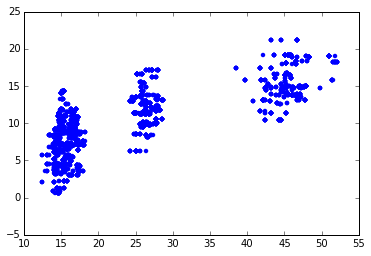

In [54]:
plt.scatter(cases['SCK3_NO2'],cases['FS_WS'],linewidths=0)

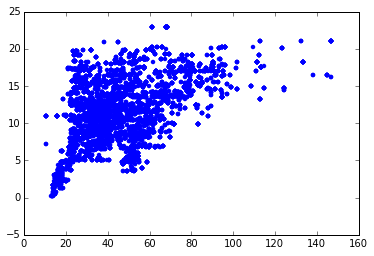

In [55]:
plt.scatter(nocases['SCK3_NO2'],nocases['FS_WS'],linewidths=0)